## Github: https://github.com/mr-aditt/Deep-Learning-and-Applications 

In [7]:
import pandas as pd
import numpy as np
import cv2
import glob2

In [8]:
import os
from glob2 import glob
df = pd.DataFrame()
target = list()
# Fetching dataset from local directory
Path = 'C:\\Users\\mradi\\Desktop\\Jupyter\\DLA\MNIST\\MNIST as jpg dataset only 0 and 1\\'#change to where dataset is stored
list_subfolders_with_paths = [f.path for f in os.scandir(Path) if f.is_dir()]
# print(list_subfolders_with_paths)
for sub_folder_name in range(len(list_subfolders_with_paths)):
    for path in sorted(glob(list_subfolders_with_paths[sub_folder_name]+"\\img_*.JPG")):
        img = cv2.imread(path,0)
        df = df.append(pd.DataFrame(img.reshape(1,-1)))
        target.append(sub_folder_name)
# print(target)

In [ ]:
# len(target)

In [9]:
# Add column names to dataframe
col = ['Pixel'+str(i) for i in range(784)]
df.columns = col
df.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
0,3,0,0,3,7,3,0,3,0,11,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Add target to dataframe
df['Target'] = target
df.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Target
0,3,0,0,3,7,3,0,3,0,11,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df['Target'].value_counts()

1    4684
0    4132
Name: Target, dtype: int64

In [12]:
# df.describe()

In [13]:
# export to excel
# df.to_excel(r'C:\\Users\\mradi\\Desktop\\Jupyter\\DLA\\My_Taliored_MNIST_dataset.xlsx',index = False)

# import from excel
# df = pd.read_excel('C:\\Users\\mradi\\Desktop\\Jupyter\\DLA\\My_Tailored_MNIST_dataset.xlsx')

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(['Target'],axis=1),target,test_size = 0.3, stratify = target, random_state = 100)
mlp_clf = MLPClassifier(hidden_layer_sizes = (393,), activation = 'relu', learning_rate_init = 0.1)
mlp_clf.fit(Xtrain,ytrain)


MLPClassifier(hidden_layer_sizes=(393,), learning_rate_init=0.1)

In [15]:
print('Test score: {:.2f}%'.format(mlp_clf.score(Xtest,ytest)*100))

Test score: 99.13%


Text(33.0, 0.5, 'Predicated values')

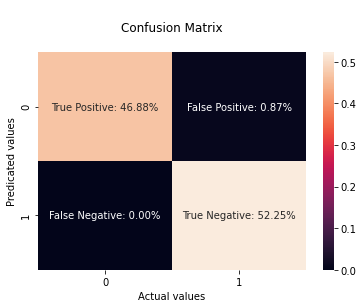

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusionMatrix = confusion_matrix(mlp_clf.predict(Xtest), ytest,labels = [0,1])

group_names = np.asarray(['True Positive','False Positive','False Negative','True Negative'])
group_percentages = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten()/np.sum(confusionMatrix)]
quadrant_display = [(n,p) for n,p in zip(group_names,group_percentages)]

labels = list()
for i in range(len(quadrant_display)):
    labels.append((str(quadrant_display[i][0]) +str(': ') + str(quadrant_display[i][1])))
# labels
# np.asarray(label).reshape(2,2)

sns.heatmap(confusionMatrix/np.sum(confusionMatrix),fmt='',annot = np.asarray(labels).reshape(2,2))
plt.title("\nConfusion Matrix\n")
plt.xlabel("Actual values")
plt.ylabel("Predicated values")